# 11_03.Topic Analysis(sklearn모듈)
- https://griddb.net/en/blog/topic-modeling-with-lda-using-python-and-griddb/


## 1.기본 package 설정

### 1.1 그래프 한글 인식 세팅

In [ ]:
# 단어 빈도 및 워드 클라우드에 한글 인식하기기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

### 1.2 KoNLPY 세팅

In [ ]:
! pip install konlpy

### 1.3 package 설정

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 전처리
import re                             # 정규식 모듈 임포트

## 3.형태소 처리
from konlpy.tag import Okt

## 4.DTM 만들기
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## 5.토픽만들기
from sklearn.decomposition import LatentDirichletAllocation


## 2.데이터 가져오기

### 2.1 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tm.csv', encoding="cp949")
tm_df.head()

,no,구분,전공,본문
0,1,post,전공,코로나19라는 펜데믹 상황에서 \n사람이 모이면 안되는 상황인지라 실험을 진행하는데...
1,2,pre,교양,"3시간이라는 시간이 조금 길 수도 있겠다는 생각이 들지만, 필요한 정보를 많이 얻을..."
2,3,pre,교양,가장 특이하지만 또 가장 이상적인 모습의 교수님이었습니다 나무가 아닌 숲을 보는 수...
3,4,pre,교양,"각자의 생각이 다르고, 대학에 온 이유도 다를텐데, 동영상 ucc제작을 하는 이유를..."
4,5,pre,교양,강사님에 따라 강의 시간이 좋기도 하고 지루하기도 했다.


In [ ]:
tm_df.info()

In [ ]:
tm_df['본문'].iloc[0]

### 2.2 문서 전처리

In [ ]:
tm_list = []

for i in range(len(tm_df)):
    text = tm_df['본문'].iloc[i]
    text = re.sub('[\x00-\x1F\x7F]', "", text)                # 제어문자[\n, \t] 제거 [[:cntrl:]]
    text = re.sub("[\W]", " ", text)                          # 구두점 등 제거 - 문자와 숫자만 저장
    #text = re.sub("[^\D]", " ", text)                         # 숫자제거
    text = re.sub('(Zoom 수업|Zoom수업|줌 수업)', '줌수업', text)
    text = re.sub('강의', '수업', text)
    tm_list.append(text)

# 2개 단어를 한단어로 통합
# re.sub('(강서 대학교|강서대학|강서 대학)', '강서대학교', text)

# 같은 단어를 한 단어로 변경
# re.sub("공부\\w*", "공부", word)
# re.sub("\\w*\\습니\\w*", "삭제", word)

In [ ]:
tm_list[0]

## 3.형태소로 분리 및 불용어제거
- https://konlpy.org/ko/latest/api/konlpy.tag/
- 명사와 동사 추출
- 한단어 삭제
- 동사만 추출은 부록 참고
- 불용어 제거: 단어빈도분석을 한 후에, 문제 있는 단어를 찾은 후에 불용어 제거

In [ ]:
# 명사 및 동사 추출을 함수로 만들기
def okt_token(text):
    okt = Okt()
    words_list = []
    stop_words = ["하다", "있다", "되어다", "수업", "교수", "학생", "이다"]
    morp = okt.pos(text, stem=True)                              # stem = 동사 원형 추출
    #명사와 동사 추출, 한 글자 단어 삭제, 불용어 제거
    for word, tag in morp:
        if ((tag == 'Noun' or tag == 'Verb' or tag == 'Adjective')
             and (len(word) > 1)
             and (word not in stop_words)):
            words_list.append(word)
    return words_list

## 4.Document-Term Matrix 만들기
- https://cypision.github.io/deep-learning/text_analysis_basic_01_sckit_learn/

In [ ]:
# matrix 만들기
cv = CountVectorizer(ngram_range=(1,1),        # 1:1 단일어로
                     tokenizer = okt_token)    # 한글 형태소 분석기로 세팅

In [ ]:
dtm_counts = cv.fit_transform(tm_list)
dtm_counts.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dtm_df = pd.DataFrame(dtm_counts.todense().tolist(),
                      columns = cv.get_feature_names_out())
dtm_df

,가게,가까이,가깝다,가끔,가능성,가능하다,가다,가도,가독성,가득하다,...,흥미,흥미롭다,희망,히브리어,힐링,힘내다,힘드다,힘들다,힘들엇습니,힘쓰다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.Topic 만들기

### 5.1 최적 토픽수 찾기

In [ ]:
min, max, step = 2, 11, 1
perplexity_score = []
likelyhood_score = []

for i in range(min, max, step):
    lda_model = LatentDirichletAllocation(n_components = i,
                                          random_state = 1,
                                          n_jobs = -1)
    lda_model.fit(dtm_counts)
    perplexity_score.append(lda_model.perplexity(dtm_counts))
    likelyhood_score.append(lda_model.score(dtm_counts))

In [ ]:
print(perplexity_score)
print(likelyhood_score)

[896.839344180488, 918.9920339987481, 973.4494347614116, 1014.2152543362563, 1043.627963138365, 1081.208436413376, 1110.1650455889512, 1133.38767006298, 1161.7669640039653]
[-179517.54151002975, -180161.81790067666, -181681.85466224907, -182765.06720351614, -183519.9022149185, -184453.97723244087, -185151.81794237738, -185698.44390040584, -186351.44135670844]


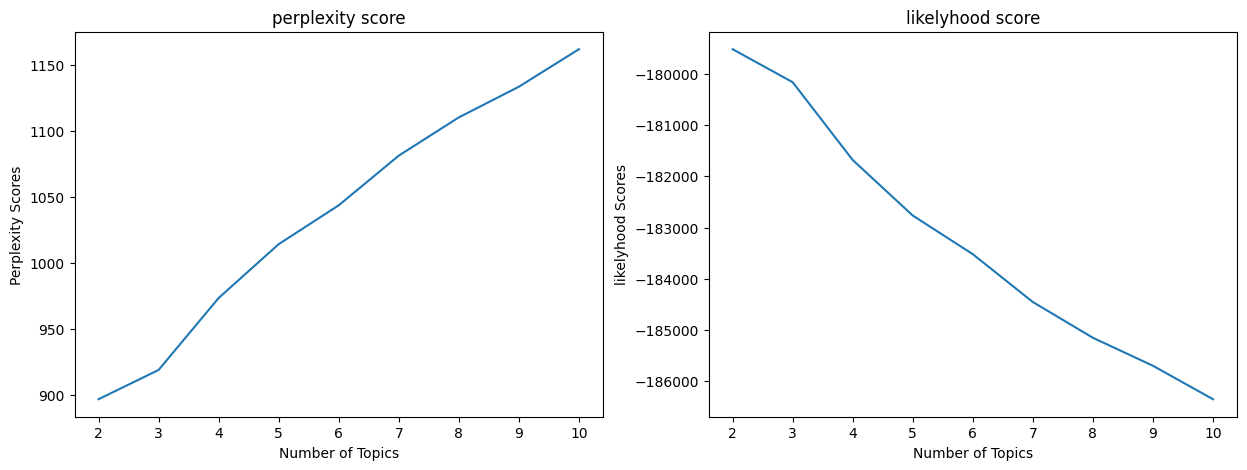

In [ ]:
# 그래프 그리기
fig ,ax = plt.subplots(1, 2, figsize=(15, 5))
x = [i for i in range(min, max, step)]

plt.subplot(1,2, 1)
plt.title("perplexity score")
plt.plot(x, perplexity_score)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Scores')

plt.subplot(1,2, 2)
plt.title("likelyhood score")
plt.plot(x, likelyhood_score)
plt.xlabel('Number of Topics')
plt.ylabel('likelyhood Scores')
plt.show()


### 5.2 최적 토픽 분석

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components = 4,
                                      random_state=1,
                                      n_jobs = -1)

lda_model.fit(dtm_df)

LatentDirichletAllocation(n_components=4, n_jobs=-1, random_state=1)

In [ ]:
from pprint import pprint
print("Log Likelihood: ", lda_model.score(dtm_counts))   # Log Likelyhood: 높을 수록 좋음
print("Perplexity: ", lda_model.perplexity(dtm_counts))  # Perplexity: 낮을 수록 좋음. exp(Log Likelyhood)
pprint(lda_model.get_params())                           # 전체 세팅값 확인

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Log Likelihood:  -181681.85466224907
Perplexity:  973.4494347614116
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 1,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


## 6.Topic과 단어(beta)

### 6.1 term-topic matrix

In [66]:
cv.get_feature_names_out()

array(['가게', '가까이', '가깝다', ..., '힘들다', '힘들엇습니', '힘쓰다'], dtype=object)

In [ ]:
topic_names = ["Topic" + str(i) for i in range(lda_model.n_components)]
term_beta_df = pd.DataFrame(lda_model.components_)
term_beta_df.columns = cv.get_feature_names_out()
term_beta_df.index = topic_names
term_beta_df.head().T

,Topic0,Topic1,Topic2,Topic3
가게,1.249946,0.250019,0.250013,0.250021
가까이,2.248304,0.250038,0.250027,0.251630
가깝다,0.250014,0.250031,4.224618,0.275337
가끔,2.966783,9.610102,3.171733,0.251382
가능성,3.241917,0.250033,0.257637,1.250412
...,...,...,...,...
힘내다,0.250007,1.249974,0.250008,0.250012
힘드다,13.768414,8.987477,3.917628,0.326481
힘들다,29.141952,16.313398,33.879261,25.665389
힘들엇습니,0.250087,0.250166,1.249577,0.250169


### 6.2 Topic별 중요 단어 추출

In [ ]:
keywords = np.array(cv.get_feature_names_out())

topic_words = []

for topic_weights in lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:15]
    topic_words.append(keywords.take(top_keyword_locs))

term_topic_df = pd.DataFrame(topic_words,
                             index = topic_names).T
term_topic_df

,Topic0,Topic1,Topic2,Topic3
0,좋다,좋다,과제,시험
1,많다,감사하다,좋다,좋다
2,학기,해주다,되다,같다
3,감사하다,자다,않다,시간
4,해주다,들다,같다,되다
5,어렵다,같다,해주다,않다
6,이해,정말,시간,보다
7,내용,않다,부분,해주다
8,동안,설명,많다,아니다
9,드리다,친절하다,없다,학교


In [ ]:
# index를 토픽명으로 수정
Topics = ["감사","친절","과제","시험"]
term_topic_df.columns = Topics
term_topic_df

,감사,친절,과제,시험
0,좋다,좋다,과제,시험
1,많다,감사하다,좋다,좋다
2,학기,해주다,되다,같다
3,감사하다,자다,않다,시간
4,해주다,들다,같다,되다
5,어렵다,같다,해주다,않다
6,이해,정말,시간,보다
7,내용,않다,부분,해주다
8,동안,설명,많다,아니다
9,드리다,친절하다,없다,학교


## 7.Topic과 문서(gamma)

### 7.1 document-topic matrix

In [ ]:
lda_output = lda_model.fit_transform(dtm_counts)

doc_names = ["Doc" + str(i) for i in range(len(tm_list))]

doc_topic_df = pd.DataFrame(np.round(lda_output, 2),
                             columns = topic_names,
                             index = doc_names)
doc_topic_df.head()

,Topic0,Topic1,Topic2,Topic3
Doc0,0.01,0.00,0.42,0.57
Doc1,0.93,0.02,0.02,0.02
Doc2,0.56,0.41,0.01,0.01
Doc3,0.35,0.02,0.02,0.60
Doc4,0.04,0.66,0.27,0.04


### 7.2 문서별 중요한 토픽 찾기

In [ ]:
# 문서별 중요한 토픽 찾기
doc_topic = np.argmax(doc_topic_df.values, axis=1)
doc_topic_df["doc_topic"] = doc_topic + 1

def color(val):
    color = "red" if val > .5 else "white"
    return "color: {col}".format(col = color)

doc_topic_df = doc_topic_df.head(20).style.applymap(color)
doc_topic_df

,Topic0,Topic1,Topic2,Topic3,doc_topic
Doc0,0.010000,0.000000,0.420000,0.570000,4
Doc1,0.930000,0.020000,0.020000,0.020000,1
Doc2,0.560000,0.410000,0.010000,0.010000,1
Doc3,0.350000,0.020000,0.020000,0.600000,4
Doc4,0.040000,0.660000,0.270000,0.040000,2
Doc5,0.980000,0.010000,0.010000,0.010000,1
Doc6,0.020000,0.020000,0.940000,0.020000,3
Doc7,0.010000,0.010000,0.530000,0.460000,3
Doc8,0.450000,0.490000,0.030000,0.030000,2
Doc9,0.010000,0.290000,0.690000,0.010000,3
